***Objective:***  Get, clean and analyze the 2020 year test results from the Mexican University UNAM. This with the purpose of making basic statistic using Python and Data Science libraries.  

# ***Getting the data***

## 1
### PACKAGE IMPORTATIONS

In [2]:
import urllib.request
from urllib.parse import urljoin
from bs4 import BeautifulSoup
import ssl
from collections import defaultdict
import re
import pandas as pd
import requests

## 2
### GETTING THE LINKS PER ROUND AND SCHOOL

In this seccion we are going to get all the links for the different schools that the university has only for the year 2020. There is a link base that is going to be looped for each round and then for each school. From now, we are going to refer to each link as **link-1**

Click [here](https://www.dgae.unam.mx/Febrero2020/resultados/15.html) to see an example of the links we are getting 

In [5]:
link_base = "https://www.dgae.unam.mx/month2020/resultados/school.html"

def SchoolRoundLinks(link_base):
    months = ("Febrero", "Junio", "Noviembre") 
    schools = ("15", "25", "35", "45") 
    for month in months:
        for school in schools:
            x = link_base.replace("month",month).replace("school",school)
            try:
                ProgramLinks(x)
            except: 
                print("This link did not return a respond",todo)
                continue

## 3
### GETTING THE LINKS OF EACH PROGRAM 

After getting all the link-1 combinations, we need to get all the programs links withing each previous link-1, nevertheless, we are only looking for the links that are going to take us to the programs page. To do that we use the request library that allow us to make a get call from each link-1, saving the html body in a variable that is going excluding everything but the links that finish with *5.html* which are links of each program. From now we are going to refer to the second round of links as **link-2**.

Click [here](https://www.dgae.unam.mx/Febrero2020/resultados/1/10100035.html) to see an example of the links we are getting 

In [4]:
def ProgramLinks(school_round_links):
    url_base = school_round
    html = requests.get(url_base).text
    soup = BeautifulSoup(html, "html.parser")
    tags = soup("a")
    for tag in tags:
        x = tag.get("href")
        if not x.endswith("5.html"):
            Scores(url_base, x)
        

## 4
### CREATING A DICTIONARY WITH THE EXAM SCORES

Once we get all the links_2, we are ready to extract all the data from the webpageS. To do it we are going to create a diccionary with the name of the program as the dictionary's key and the folios and scores as the values. Just like before, we are going to create a get request method for the html body iterating the data trought each row of data from the table.

In [11]:
def Scores(url_base,extension): 
    global datos
    datos = Defaultdic(list)
    url = urljoin(url_base,extension)
    html = requests.get(url).text
    soup = BeautifulSoup(html, "html.parser")
    name_tags = soup("h2")
    tr_tags = soup("tr")
    info_tags = soup("h5")
    for h5 in info_tags:
        if "Oferta" in h5.text:
            for h2 in name_tags:
                for tr in tr_tags:
                    datos[url_name(h2.text,h5.text)].append(clean_data(tr))



In order to keep the Scores function clean, we created two more functions that are going to be called in the last line of  the Score's function in order to clean the data. This is becase we only care for specifics values of the table 

In [6]:
def url_name(h2,h5):
    name_1 = re.findall('Concurso (.+)',h2)[0].strip()
    name_2 = re.findall('-(.+)',h2)[0].strip()
    name_3 = h5.split()[0] + '-' + h5.split()[-2]
    return name_1 + "-" +name_2 + "-" + name_3

In [77]:
def clean_data(tr):
    return [td.split("\n")[1:-2] for td in tr.text.split(",") if "Consultar" in td]

# ***Cleaning the data***

# 1
### SETTING UP A TABLE 

At this point, we own all the data from each one of the links_2 that we generated previously that is store in our dictionary. Now, we are going to focus on given the data a good cleaning. There are empty values in the rows that we got, we are going to get rid of those values and assing a value 999 to the ones that we mind want to keep. The clean data in going to be store in another dictionary to create a table.

In [3]:
dicts = defaultdict(dict)
def to_dicts(datos):
    for key in datos.keys():
        for values in datos[key]:
            for value in values:
                if value:
                    dicts[key][value[0]] = (value[1].strip(),value[2])
                    if value[1]== "":
                        dicts[key][value[0]] = ("999",value[2])
                    else:
                        dicts[key][value[0]] = (value[1].strip(),value[2])
                       

Once our dictionary is created we can use the library pandas to create a table. We can see how the table has the keys of the dictionary as the columns and the values as the rows with folio number as the index.

In [49]:
df = pd.DataFrame(dicts)
df

,Febrero 2020 : (101) ACTUARIA-FACULTAD DE CIENCIAS-Oferta=40-Minimos=107,Febrero 2020 : (101) ACTUARIA-FES ACATLAN-Oferta=36-Minimos=97,Febrero 2020 : (102) ARQUITECTURA-FACULTAD DE ARQUITECTURA-Oferta=190-Minimos=91,Febrero 2020 : (102) ARQUITECTURA-FES ACATLAN-Oferta=63-Minimos=82,Febrero 2020 : (102) ARQUITECTURA-FES ARAGON-Oferta=60-Minimos=80,Febrero 2020 : (103) ARQUITECTURA DE PAISAJE-FACULTAD DE ARQUITECTURA-Oferta=15-Minimos=93,Febrero 2020 : (133) CIENCIA DE MATERIALES SUSTENTABLES-ESCUELA NAL. DE ESTUDIOS SUP. UNIDAD MORELIA-Oferta=30-Minimos=62,Febrero 2020 : (104) CIENCIAS DE LA COMPUTACION-FACULTAD DE CIENCIAS-Oferta=28-Minimos=107,Febrero 2020 : (127) CIENCIAS DE LA TIERRA-ESCUELA NACIONAL DE CIENCIAS DE LA TIERRA-Oferta=20-Minimos=101,Febrero 2020 : (127) CIENCIAS DE LA TIERRA-ESCUELA NAL. DE ESTUDIOS SUP. UNIDAD MERIDA-Oferta=15-Minimos=57,...,"Junio 2020 : (439) LINGÜISTICA APLICADA-ESCUELA NACIONAL DE LENGUAS,LINGUISTICA Y TRADUCCIÓN-Oferta=8-Minimos=97",Junio 2020 : (420) LITERATURA DRAMATICA Y TEATRO-FACULTAD DE FILOSOFIA Y LETRAS-Oferta=12-Minimos=103,Junio 2020 : (432) LITERATURA INTERCULTURAL-ESCUELA NAL. DE ESTUDIOS SUP. UNIDAD MORELIA-Oferta=12-Minimos=46,Junio 2020 : (438) MUSICA Y TECNOLOGIA ARTISTICA-ESCUELA NAL. DE ESTUDIOS SUP. UNIDAD MORELIA-Oferta=5-Minimos=40,Junio 2020 : (421) PEDAGOGIA-FACULTAD DE FILOSOFIA Y LETRAS-Oferta=70-Minimos=77,Junio 2020 : (421) PEDAGOGIA-FES ACATLAN-Oferta=40-Minimos=73,Junio 2020 : (421) PEDAGOGIA-FES ARAGON-Oferta=70-Minimos=76,Junio 2020 : (422) PIANO-FACULTAD DE MUSICA-Oferta=12-Minimos=43,"Junio 2020 : (440) TRADUCCION-ESCUELA NACIONAL DE LENGUAS,LINGUISTICA Y TRADUCCIÓN-Oferta=5-Minimos=114","Junio 2020 : (440) TRADUCCION-SAN MIGUEL DE ALLENDE, GUANAJUATO-Oferta=7-Minimos=40"
000052,"(106, )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000064,"(81, )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000123,"(77, )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000125,"(999, N)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000129,"(59, )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(79, S)"
359069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(999, N)"
359080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(999, N)"
359093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(89, S)"


# 2
### Creating Columns

To make the table more understandable we need to create columns for it. So far, we can create 3 columns with all the information, nevertheless, there is data within each column stored as a string that we need to split an store it in a new column

In [16]:
df = df.stack()
df = pd.DataFrame(df).reset_index() 
df.columns = ["Folio", "Program", "Score"]
df.head()

,Folio,Program,Score
0,17,Febrero 2018 : (101) ACTUARIA-FACULTAD DE CIEN...,"('82', '')"
1,43,Febrero 2018 : (101) ACTUARIA-FACULTAD DE CIEN...,"('109', 'A')"
2,59,Febrero 2018 : (101) ACTUARIA-FACULTAD DE CIEN...,"('106', 'A')"
3,70,Febrero 2018 : (101) ACTUARIA-FACULTAD DE CIEN...,"('96', '')"
4,73,Febrero 2018 : (101) ACTUARIA-FACULTAD DE CIEN...,"('62', '')"


Because most of the data is stored in the column *Program*, we are going to extract the data from that column and create new ones with its corresponding name

In [ ]:
df["Faculty"] = df.apply(lambda x: x["Program"].split("-")[-3], axis = 1)
df["ScoreMin"] = df.apply(lambda x: x["Program"].split("-")[-1].split("=")[-1], axis = 1)
df["Code"] = df.apply(lambda x: x["Program"].split("-")[0].split()[3].strip("()"), axis = 1)
df["Round"] = df.apply(lambda x: x["Program"].split(":")[0].split()[0], axis = 1)
df["Year"] = df.apply(lambda x: x["Program"].split(":")[0].split()[1], axis = 1)
df["Score"] = df.apply(lambda x: x["Score"].split("'")[1], axis = 1).astype("f")
df["Program"] = df.apply(lambda x: x["Program"].split("-")[0].split(":")[1], axis = 1)
df["Program"] = df.apply(lambda x: x["Program"].split(")")[1:][0].strip(), axis = 1)
df["ScoreMin"] = df["ScoreMin"].astype("f")
df["Year"] = df.Year.astype("int64")
df["Code"] = df["Code"].astype("int64")
# Replacing "999.0" for NaN values
df.replace(999.0, np.nan, inplace = True)

Finally we are going to replace the name of some programs that were alterated from creating the columns. After that, we are going to have a nice good looking table.

In [ ]:
df.replace({'LENGUA Y LITERATURAS MODERNAS (LETRAS ALEMANAS':'LENGUA Y LITERATURAS MODERNAS (LETRAS ALEMANAS)',
           'LENGUA Y LITERATURAS MODERNAS (LETRAS FRANCESAS':'LENGUA Y LITERATURAS MODERNAS (LETRAS FRANCESAS)',
           'LENGUA Y LITERATURAS MODERNAS (LETRAS INGLESAS':'LENGUA Y LITERATURAS MODERNAS (LETRAS INGLESAS)',
           'LENGUA Y LITERATURAS MODERNAS (LETRAS ITALIANAS':'LENGUA Y LITERATURAS MODERNAS (LETRAS ITALIANAS)',
           'LENGUA Y LITERATURAS MODERNAS (LETRAS PORTUGUESAS':'LENGUA Y LITERATURAS MODERNAS (LETRAS PORTUGUESAS)'}, inplace =True)

In [10]:
df.head()

,Folio,Program,Score,Faculty,ScoreMin,Code,Round,Year
0,52.0,ACTUARIA,106.0,FACULTAD DE CIENCIAS,107.0,101,Febrero,2020
1,64.0,ACTUARIA,81.0,FACULTAD DE CIENCIAS,107.0,101,Febrero,2020
2,123.0,ACTUARIA,77.0,FACULTAD DE CIENCIAS,107.0,101,Febrero,2020
3,125.0,ACTUARIA,NaN,FACULTAD DE CIENCIAS,107.0,101,Febrero,2020
4,129.0,ACTUARIA,59.0,FACULTAD DE CIENCIAS,107.0,101,Febrero,2020


# ***ANALIZING THE DATA***

# 1
### BASIC STATISTICS

Now that we have a table, we can use the library pandas to get some insights from our data. For example, we can use the method describe to see a summary of the colum Score. But first, let's see how many rows of data we have.

In [28]:
df.shape

(218479, 8)

In [21]:
df.Score.describe()

count    197488.000000
mean         58.155174
std          19.283798
min           0.000000
25%          43.000000
50%          54.000000
75%          70.000000
max         119.000000
Name: Score, dtype: float64

More than 200k people apply for the exam and looks like someone got almost a perfect score! Let's see what program that person got in. With pandas we can filter the information very easyly

In [29]:
df[df.Score==119.0]

,Folio,Program,Score,Faculty,ScoreMin,Code,Round,Year
12550,30827.0,FISICA,119.0,FACULTAD DE CIENCIAS,110.0,106,Febrero,2020
147702,40606.0,ACTUARIA,119.0,FACULTAD DE CIENCIAS,111.0,101,Junio,2020
149702,45489.0,ARQUITECTURA,119.0,FACULTAD DE ARQUITECTURA,98.0,102,Junio,2020
162000,38153.0,MATEMATICAS,119.0,FACULTAD DE CIENCIAS,107.0,122,Junio,2020
176094,135854.0,MEDICO CIRUJANO,119.0,FACULTAD DE MEDICINA,115.0,208,Junio,2020
179552,160908.0,MEDICO CIRUJANO,119.0,FACULTAD DE MEDICINA,115.0,208,Junio,2020
179876,163118.0,MEDICO CIRUJANO,119.0,FACULTAD DE MEDICINA,115.0,208,Junio,2020
186130,162023.0,PSICOLOGIA,119.0,FACULTAD DE PSICOLOGIA,105.0,210,Junio,2020
205600,261313.0,ECONOMIA,119.0,FACULTAD DE ECONOMIA,90.0,306,Junio,2020
208494,273611.0,RELACIONES INTERNACIONALES,119.0,FES ACATLAN,98.0,310,Junio,2020


Only 10 people out out more than 200,000 got that score, interesting. We can also graph things a little bit more complicated like the distribution of the data.

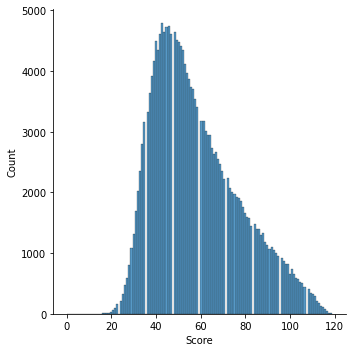

In [30]:
sns.displot(df['Score'])

# CONCLUSION

As we saw, getting the data that we are going to analize is one of the most tricky parts. After that, cleaning the data is also a very meticulous process, especially if you are not sure what kind of analysis you are going to do, this is because we may delete usefull data. This was a very fun project that I would say is still not finish because there are many other insight we can still get, especially if we get more data sets from other years, for example, we can analyze the non-attandance per yer. Was Covid the responsable of the following diagram?

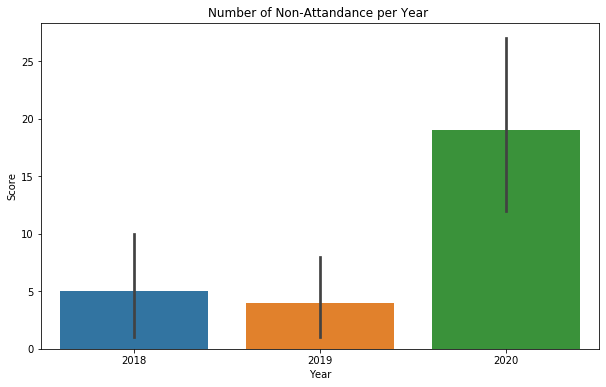

Maybe... that would involve more data and more analisis. Anyways, thanks for reading!

***Miguel L.***


*https://github.com/lopezpedres/UNAM-Flask*